In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.special import zeta
from scipy.stats import gamma
import pcms.tree

In [2]:
GAMMA = 0.57721566490153286060651209008240243

In [3]:
tree = pcms.tree.cbst(n_leaves=10)
tree.print()

└── X
    ├── X
    │   ├── X
    │   └── X
    │       ├── X
    │       └── X
    │           ├── X
    │           └── X
    └── X
        ├── X
        │   ├── X
        │   └── X
        └── X
            ├── X
            └── X
                ├── X
                └── X
                    ├── X
                    └── X


In [4]:
def draw_epl(n_samples, n_leaves):
    epls = []
    for _ in range(n_samples):
        tree = pcms.tree.cbst(n_leaves=n_leaves)
        epls.append(tree.find_epl())
    return np.array(epls)

In [82]:
n_samples = 100000
n_leaves = 200

hist_draw = draw_epl(n_samples=n_samples, n_leaves=n_leaves)

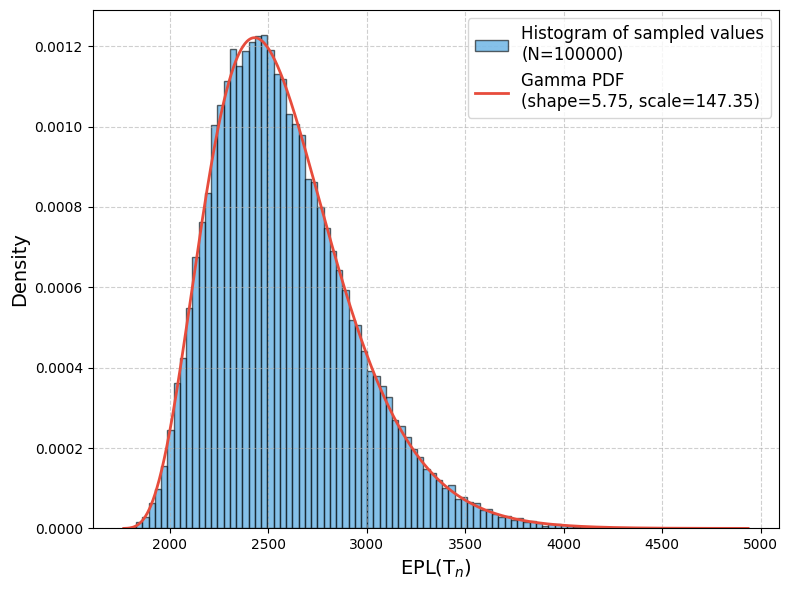

In [83]:
n_bins = 100

# Compute histogram and fit Gamma density
hist, bins = np.histogram(hist_draw, bins=n_bins, density=True)
centers = (bins[:-1] + bins[1:]) / 2
shape, loc, scale = gamma.fit(hist_draw)

# Generate x values for Gamma PDF
xvals = np.linspace(bins[0], bins[-1], 1000)
gamma_pdf = gamma.pdf(xvals, shape, loc=loc, scale=scale)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))  # Larger figure for better visualization

# Histogram
ax.hist(hist_draw, bins=n_bins, density=True, alpha=0.6, color='#3498db', edgecolor='black',
        label=f"Histogram of sampled values\n(N={n_samples})")

# Gamma PDF
ax.plot(xvals, gamma_pdf, color='#e74c3c', lw=2, label=f"Gamma PDF\n(shape={shape:.2f}, scale={scale:.2f})")

# Titles and labels
ax.set_xlabel(r'$\mathrm{EPL}(\mathrm{T}_n)$', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)

# Grid and legend
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

plt.show()

In [5]:
E = lambda n: 1 / (2 * zeta(2)) * n * np.log(n)**2 + (GAMMA * zeta(2) + zeta(3)) / zeta(2)**2 * n * np.log(n)
c = 0
A = 1 / (4 * zeta(2)**2)
B = (GAMMA * zeta(2) + zeta(3)) / (zeta(2)**3) 
C = (2 * zeta(3) - zeta(2)) / (zeta(2)**2) 
D = (1 / (2 * zeta(2)**3)) * (9 * zeta(2) + 2 * GAMMA * (3 * GAMMA - 2) * zeta(2)**2 + 2 * (3 + c) * zeta(2)**3 + 8 * (1 + 2 * GAMMA) * zeta(2) * zeta(3) - 8 * zeta(2)**2 * zeta(3) + 12 * zeta(3)**2 - 12 * zeta(2) * zeta(4))
E2 = lambda n: n**2 * ( A * np.log(n)**4 + B * np.log(n)**3 + C * np.log(n)**2 + D * np.log(n))
V = lambda n: 1 / (2 * zeta(2)**2) * n**2 * np.log(n)**4 + (-zeta(2)**2 + zeta(2) * (GAMMA + 1) + zeta(3)) / zeta(2)**3 * n**2 * np.log(n)**3

In [6]:
print(A, B, C, D)

0.09239384029215902 0.48339667617337995 0.28057412640689183 5.022151977012924


In [7]:
tree = pcms.tree.Tree(n_nodes=1)
tree.print()

└── X


In [49]:
N = 10000
Ns = np.arange(2, N, 50)
n_samples = 30
means = []
vars = []
mean2s = []
for n_leaves in Ns:
    draw = draw_epl(n_samples=n_samples, n_leaves=n_leaves)
    means.append(np.mean(draw))
    vars.append(np.var(draw))
    mean2s.append(np.mean(np.pow(draw,2)))

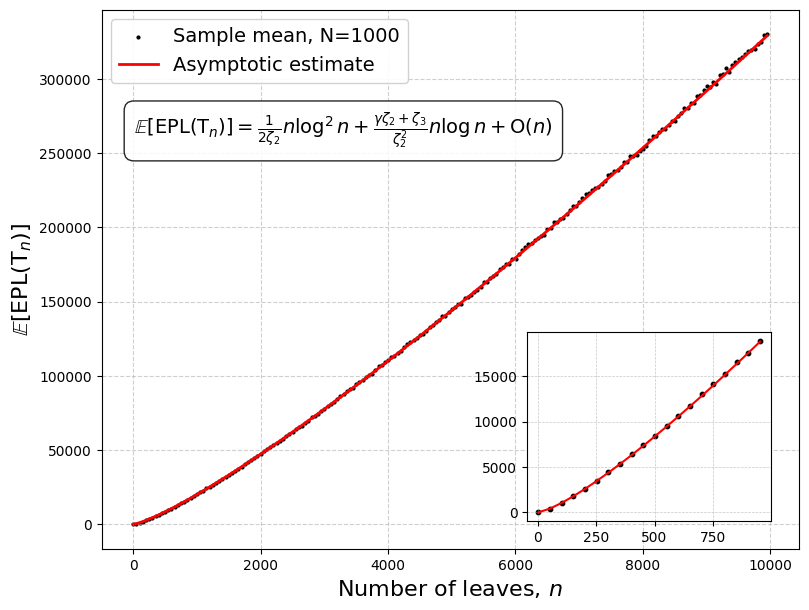

In [69]:
# Create the plot
fig, ax = plt.subplots(figsize=(9, 7))  # Larger figure size for readability

# Plot experimental and asymptotic estimates
ax.scatter(Ns, means, label=f'Sample mean, N={n_samples}', color='black', s=4)
ax.plot(Ns, E(Ns), label='Asymptotic estimate', linestyle='-', color='red', linewidth=2)

# Title and axis labels
ax.set_xlabel(r'Number of leaves, $n$', fontsize=16)
ax.set_ylabel(r'$\mathbb{E}[\mathrm{EPL}(\mathrm{T}_n)]$', fontsize=16)

# Legend and grid
ax.legend(fontsize=14, loc='upper left', frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)

# Textbox for the equation
equation_text = (r"$\mathbb{E}[\mathrm{EPL}(\mathrm{T}_n)] = \frac{1}{2\zeta_2}n\log^2 n + "
                 r"\frac{\gamma\zeta_2+\zeta_3}{\zeta_2^2}n\log n + \mathrm{O}(n)$")
ax.text(3300, 2.65e5, equation_text, fontsize=14, va='center', ha='center', 
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.85, boxstyle='round,pad=0.5'))

# Add inset plot
end = int(len(Ns)/10)
x_padding = 0.02  # Adjust x padding (fraction of the figure width)
y_padding = 0.04  # Adjust y padding (fraction of the figure height)
inset_ax = inset_axes(
    ax,
    width="35%", 
    height="35%",
    loc="lower right",
    borderpad=2
)
inset_ax.scatter(Ns[:end], means[:end], color='black', s=10)
inset_ax.plot(Ns[:end], E(Ns[:end]), color='red', linewidth=1.5)
inset_ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Improve tick formatt0125ing
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

# Show the plot
plt.show()

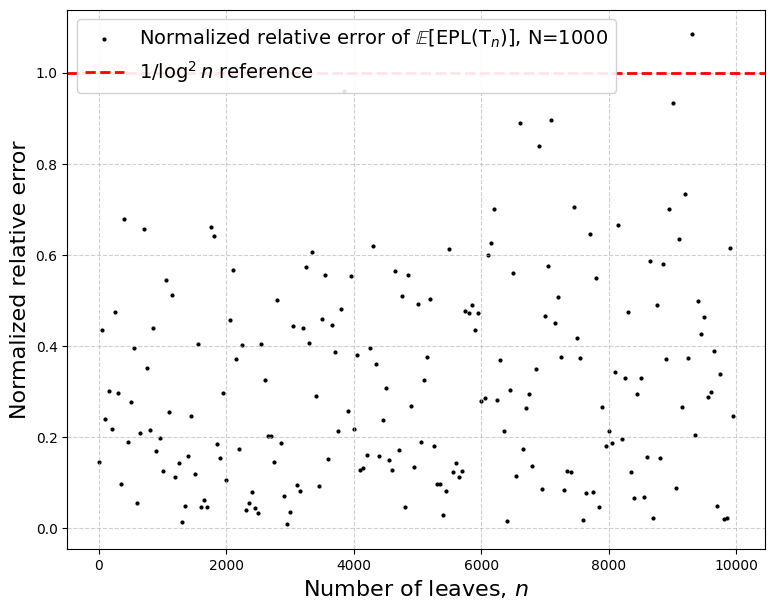

In [83]:
# Create the plot
fig, ax = plt.subplots(figsize=(9, 7))  # Larger figure size for readability

# Plot relative error
rels = np.abs((means - E(Ns)) / means)
normed_err = rels * np.log(Ns)**2
ax.scatter(Ns, normed_err, label=r'Normalized relative error of $\mathbb{E}[\mathrm{EPL}(\mathrm{T}_n)]$, '+f'N={n_samples}', color='black', s=4)
# ax.plot(Ns, 1/np.log(Ns)**2, label=r'$1/\log^2 n$', linestyle='-', color='red', linewidth=2)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label=r'$1/\log^2 n$ reference')

# Rescale y-axis
# ax.set_yscale('log')

# Title and axis labels
ax.set_xlabel(r'Number of leaves, $n$', fontsize=16)
ax.set_ylabel(r'Normalized relative error', fontsize=16)

# Legend and grid
ax.legend(fontsize=14, frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)

# Improve tick formatting
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

# Show the plot
plt.show()

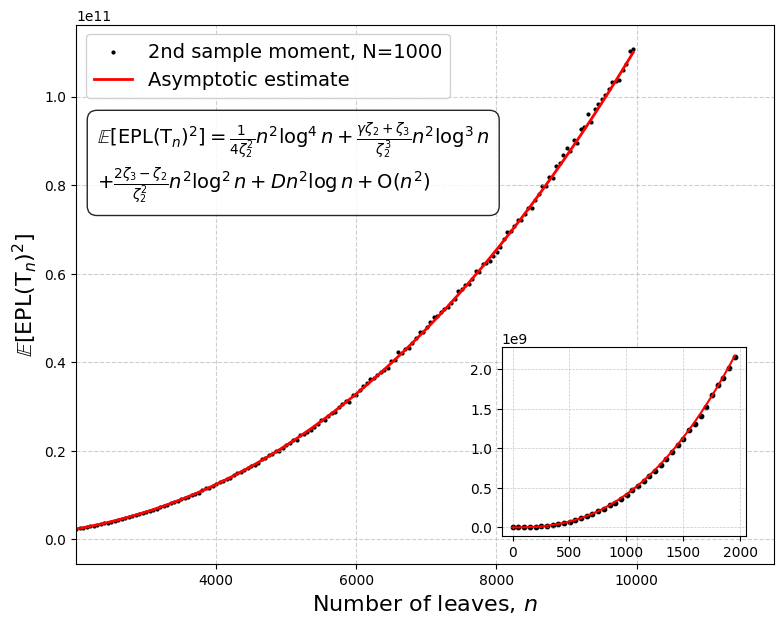

In [ ]:
end = int(len(Ns)/5)

# Create the plot
fig, ax = plt.subplots(figsize=(9, 7))  # Larger figure size for readability

# Plot experimental and asymptotic estimates
ax.scatter(Ns, mean2s, label=f'2nd sample moment, N={n_samples}', color='black', marker='o', s=4)
ax.plot(Ns, E2(Ns), label='Asymptotic estimate', linestyle='-', color='red', linewidth=2)

ax.set_xlim([Ns[end], Ns[-1] + Ns[end]]) # shift plot to make room

# Title and axis labels
ax.set_xlabel(r'Number of leaves, $n$', fontsize=16)
ax.set_ylabel(r'$\mathbb{E}[\mathrm{EPL}(\mathrm{T}_n)^2]$', fontsize=16)

# Legend and grid
ax.legend(fontsize=14, loc='upper left', frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)

# Textbox for the equation
equation_text = (
    r"$\mathbb{E}[\mathrm{EPL}(\mathrm{T}_n)^2] = \frac{1}{4\zeta_2^2} n^2 \log^4 n + \frac{\gamma\zeta_2 + \zeta_3}{\zeta_2^3} n^2 \log^3 n $" "\n"
    r"$+ \frac{2\zeta_3 - \zeta_2}{\zeta_2^2} n^2 \log^2 n + D n^2 \log n + \mathrm{O}(n^2)$"
)
ax.text(
    2300, 0.85e11, equation_text, fontsize=14, va="center", ha="left",
    multialignment="left", 
    bbox=dict(
        facecolor="white", 
        edgecolor="black", 
        alpha=0.85, 
        boxstyle="round,pad=0.5"
    )
)

# Add inset plot
x_padding = 0.02  # Adjust x padding (fraction of the figure width)
y_padding = 0.04  # Adjust y padding (fraction of the figure height)
inset_ax = inset_axes(
    ax,
    width="35%", 
    height="35%",
    loc="lower right",
    borderpad=2
)

inset_ax.scatter(Ns[:end], mean2s[:end], color='black', s=10)
inset_ax.plot(Ns[:end], E2(Ns[:end]), color='red', linewidth=1.5)

inset_ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Improve tick formatting
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

# Show the plot
plt.show()

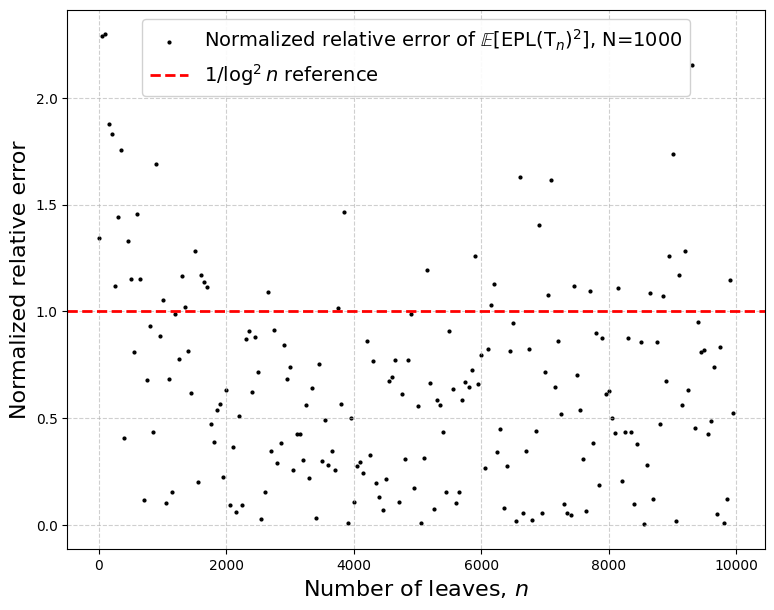

In [80]:
# Create the plot
fig, ax = plt.subplots(figsize=(9, 7))  # Larger figure size for readability

# Plot relative error
rel2s = np.abs((mean2s - E2(Ns)) / mean2s)
normed_err = rel2s * np.log(Ns)**2
ax.scatter(Ns, normed_err, label=r'Normalized relative error of $\mathbb{E}[\mathrm{EPL}(\mathrm{T}_n)^2]$, '+f'N={n_samples}', color='black', s=4)
# ax.plot(Ns, 1/np.log(Ns)**2, label=r'$1/\log^2 n$', linestyle='-', color='red', linewidth=2)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label=r'$1/\log^2 n$ reference')

# Rescale y-axis
# ax.set_yscale('log')

# Title and axis labels
ax.set_xlabel(r'Number of leaves, $n$', fontsize=16)
ax.set_ylabel(r'Normalized relative error', fontsize=16)

# Legend and grid
ax.legend(fontsize=14, frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)

# Improve tick formatting
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

# Show the plot
plt.show()